# 1. 메모리 변수 제거

In [ ]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]

# 2. 사용 패키지

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
import re

pd.set_option('display.max_colwidth',-1) # 생략되는 부분없이 내용 전부 출력

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. 데이터 로드

In [ ]:
# 모델로드
from keras.models import load_model
PATH = '/content/drive/MyDrive/4조/데이터셋/kfood/H5'
path = '/content/drive/MyDrive/4조/데이터셋'
model = load_model(PATH + '/' + '통합_CNN_SAMPLE2.h5')

In [ ]:
# 레시피, 재료 데이터 불러오기
df = pd.read_csv(path+'/recipe_en.csv')
df = df.iloc[:, :21]

In [ ]:
# review 데이터 불러오기
with open(path+'/review_result.pickle', 'rb') as fr:
    review = pickle.load(fr)
#review['후라이드치킨'] = review.pop('후라이드 치킨')
#review['자장면'] = review.pop('짜장면')

In [ ]:
## 알러지데이터 불러오기
allergy = pd.read_csv(path+'/allergy_Ingredient.csv') #읽어올때 리스트데이터를 문자열형태로 읽어온다.
for a in allergy:
  allergy[a] = [eval(allergy[a][0])]
allergy

,Beef,Pork,Nuts,Egg,Dairy,Seafood,Fish,Crustaceans,Fruit,Wheat,Bean
0,"[brisket, beef]",[trotter],[nut],[eggs],[milk],"[kelp, miyeok, clams, saeujeot, squid, mussels]","[mackerel, hairtail, fish, anchovy, anchovies, galchi]","[mussels, clams, shrimp]","[pear, apple]",[flour],"[mung, tofu, doenjang]"


## 4.예측


음식 이미지 업로드를 하시겠습니까? (Y/N) : Y
이미지 파일을 업로드 해주세요.


Saving Img_131_0029.png to Img_131_0029.png
음식 이미지 업로드를 하시겠습니까? (Y/N) : N
이미지 업로드를 종료합니다.
(1, 64, 64, 3)
<class 'numpy.ndarray'>
----- X -----


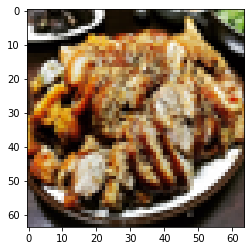

----- PREDICT -----
23 족발


In [ ]:
from google.colab import files
X = []
while True:
    key = str(input('음식 이미지 업로드를 하시겠습니까? (Y/N) : '))
    if key == 'Y':
        print('이미지 파일을 업로드 해주세요.')
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        img = Image.open(filename)
        img = img.convert('RGB')
        img = img.resize((64, 64))
        imgarr = np.array(img) / 255
        X.append(imgarr)
    elif key == 'N':
        print('이미지 업로드를 종료합니다.')
        break
    else:
        print('잘못된 값을 입력하셨습니다.')
X = np.array(X, dtype = 'float32')
print(X.shape)
print(type(X))
pred = model.predict(X)
print('----- X -----')
plt.imshow(np.hstack(X))
plt.show()
class_names = ['갈비구이', '갈비찜', '갈치조림', '계란말이', '고등어구이',
               '김밥', '김치찌개', '닭갈비', '닭볶음탕', '떡볶이',
               '라면', '만두', '미역국', '배추김치', '보쌈',
               '불고기', '비빔밥', '삼겹살', '삼계탕', '양념치킨',
               '육개장', '잡채', '제육볶음', '족발', '짜장면',
               '짬뽕', '파전', '후라이드치킨']
print('----- PREDICT -----')
for i in pred:
    print(np.argmax(i), class_names[np.argmax(i)])
food_name =  class_names[np.argmax(i)]

## 5. 출력

In [ ]:
def get_recipe(food): #레시피 출력
    recipes = pd.DataFrame(df[df.Small_cat == food].iloc[:,7:21])
    recipes = recipes.transpose()
    recipes = recipes.dropna(axis=0)
    recipes.columns = [food]
    return recipes

In [ ]:
def get_allergy(food_df):
  for al in allergy.columns:
    for a in allergy[al][0]:
      for ing in  df[df.Small_cat==food_name].Ingredient.iloc[0].split(', '):
        if a in ing:
          if al == 'Beef':
            print('Hindu taboo food : ' + ing + '\ntaboo information : '+ al + '\n')
          elif al == 'Pork':
            print('Islam taboo food : ' + ing + '\ntaboo information : '+ al + '\n')
          else:
              print('Allergy caution : '+ ing +'\nAllergy information : '+ al + '\n')


In [ ]:
get_allergy(df[df.Small_cat==food_name])

Allergy caution : eggsEgg
Allergy caution : flourWheat 


In [ ]:
print('Food(Korean) :',df[df.Small_cat==food_name]['Small_cat_en1'].iloc[0], '\nFood(English) :' ,df[df.Small_cat==food_name]['Small_cat_en2'].iloc[0])
for al in allergy.columns:
  for a in allergy[al][0]:
    for ing in  df[df.Small_cat==food_name].Ingredient.iloc[0].split(', '):
      if a in ing:
        if al == 'Beef':
          print('Hindu taboo food : ' + ing + '\ntaboo information : '+ al + '\n')
        elif al == 'Pork':
          print('Islam taboo food : ' + ing + '\ntaboo information : '+ al + '\n')
        else:
            print('Allergy caution : '+ ing +'\nAllergy information : '+ al + '\n')
print('Ratio of Positive review :',round(((review[food_name].count('positive')/len(review[food_name])) * 100),2))
print('Ingredient :', df[df.Small_cat==food_name].Ingredient.iloc[0])
#print(get_recipe(food_name))

print('\n'+df[df.Small_cat==food_name]['Small_cat_en1'].iloc[0] + ' recipe')
rec = get_recipe(food_name)
for i in range(len(rec)):
  print(rec.iloc[i,0])

Food(Korean) : Jokbal 
Food(English) : Braised Pig's Trotters
Islam taboo food : pig's trotter
taboo information : Pork

Allergy caution : saeujeot(salted fermented shrimp)
Allergy information : Seafood

Allergy caution : saeujeot(salted fermented shrimp)
Allergy information : Crustaceans

Allergy caution : apple
Allergy information : Fruit

Allergy caution : doenjang(Korean fermented soybean paste)
Allergy information : Bean

Ratio of Positive review : 75.86
Ingredient : pig's trotter, water, doenjang(Korean fermented soybean paste), mirim, soy sauce, dark brown sugar, kosher salt, rice syrup, ginger, green onion, toasted sesame seeds, apple, jujubes, garlic, red chili pepper, star anise, cinnamon stick, whole black peppercorns, ground coffee, saeujeot(salted fermented shrimp), sugar, gochu-garu(Korean hot pepper flakes), ground black pepper

Jokbal recipe
Prepare the pig’s trotter : Wash and rinse the pig’s trotter in cold water a couple of times until the water is clear. Fill a larg

In [ ]:
df[df.Small_cat==food_name].Ingredient.iloc[0]

"pig's trotter, water, doenjang(Korean fermented soybean paste), mirim, soy sauce, dark brown sugar, kosher salt, rice syrup, ginger, green onion, toasted sesame seeds, apple, jujubes, garlic, red chili pepper, star anise, cinnamon stick, whole black peppercorns, ground coffee, saeujeot(salted fermented shrimp), sugar, gochu-garu(Korean hot pepper flakes), ground black pepper"